# 최종적 실습을 위한 이미지 로드

In [1]:
import cv2
import matplotlib.pyplot as plt

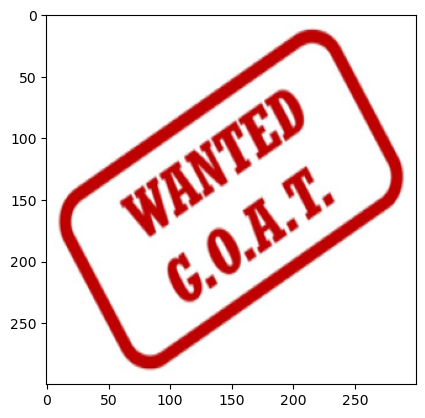

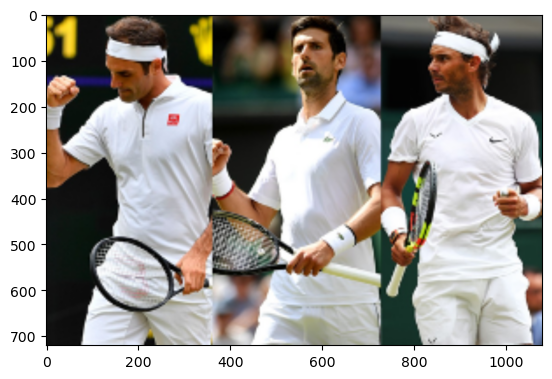

In [2]:
sample_img = cv2.imread("./data/ex_image.png")
sample_logo = cv2.imread("./data/ex_image_logo.png")

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_logo, cv2.COLOR_BGR2RGB)

# 워터마크 이미지 리사이즈 200x200 
small_img = cv2.resize(watermark, (300,300))

# 선수 이미지 사진 리사이즈 1080 X 720 
resize_img = cv2.resize(img, (1080, 720))

plt.imshow(small_img)
plt.show()

plt.imshow(resize_img)
plt.show()

이미지 크기 >>  300 300


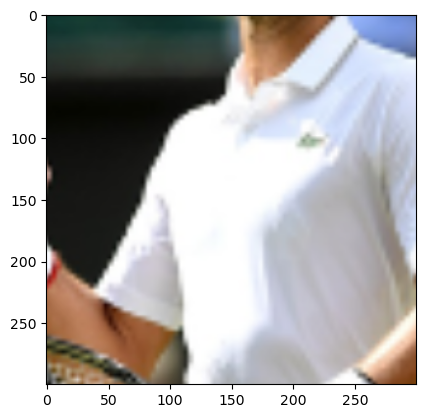

In [3]:
# 이미지 정보 가져오기 
import numpy as np

height, width, _ = small_img.shape
print("이미지 크기 >> " , height, width)

x_offset = 400 
y_offset = 170

roi = resize_img[y_offset:470, x_offset:700]
# roi = roi.astype(np.uint8)
plt.imshow(roi)
plt.show()

# logo 이미지 회색조 버전 만들기

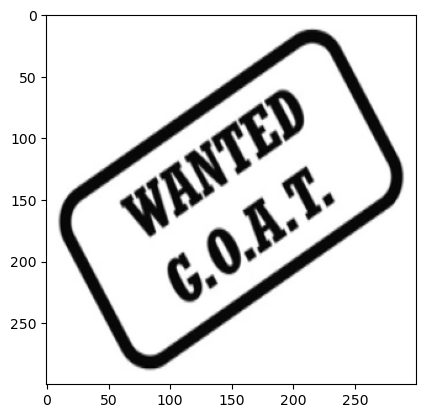

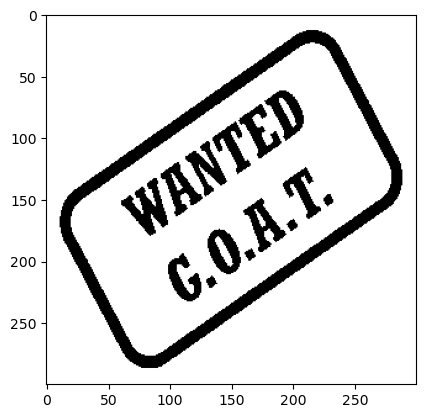

In [8]:
small_img_gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(small_img_gray, 120, 255, cv2.THRESH_BINARY)
# mask = mask.astype(np.uint8)

plt.imshow(small_img_gray, 'gray')
plt.show()

plt.imshow(mask, 'gray')
plt.show()

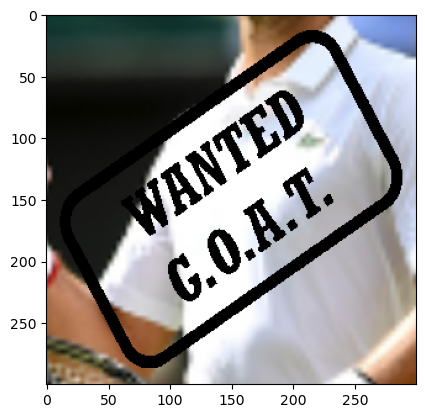

(300, 300)
(300, 300, 3)


In [6]:
bg = cv2.bitwise_or(roi,roi, mask = mask) 
plt.imshow(bg)
plt.show()

print(mask.shape)
print(roi.shape)

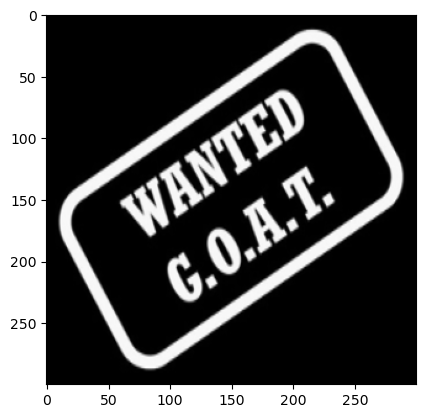

In [9]:
# 빨간색을 다시 가져오기 위해 마스크를 반전
mask_inv = cv2.bitwise_not(small_img_gray)

plt.imshow(mask_inv, 'gray')
plt.show()

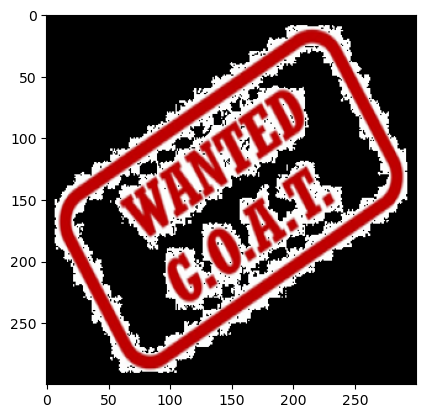

In [10]:
fg = cv2.bitwise_and(small_img, small_img, mask=mask_inv)
plt.imshow(fg)
plt.show()

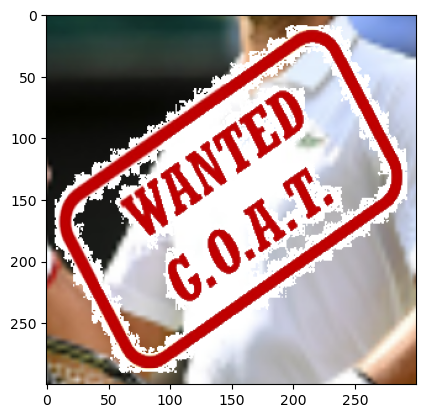

In [11]:
final_roi = cv2.add(bg, fg)
plt.imshow(final_roi)
plt.show()

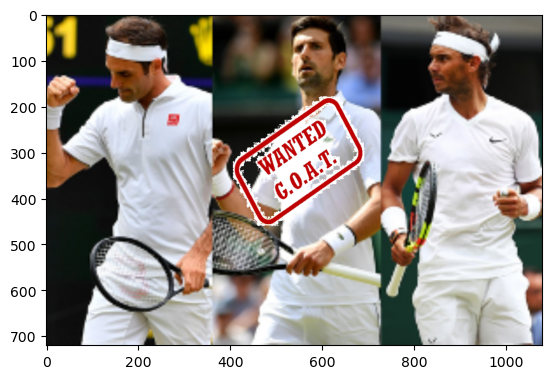

In [12]:
small_img = final_roi
resize_img[y_offset: y_offset + small_img.shape[0], x_offset : x_offset + small_img.shape[1]] = small_img

plt.imshow(resize_img)
plt.show()